# Declaration of Originality

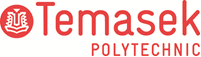

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : NG FENG KANG MALCOLM (2401779J)
* Tutorial Group                :  TC16
* Tutor						    :  MR EMILE SEBESTIAN
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
import pandas as pd # Load data manipulation library
import matplotlib.pyplot as plt # Load data visualization library
import seaborn as sns # Load statistical data visualization library
import numpy as np # Load numerical computation library

# Initialize machine learning models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error
import joblib # Used to save models


# 1. Business Understanding

#### Mental health issues such as depression are getting increasingly common among students and can negatively affect their academic performance, social relationships, and overall well-being. However, many students who are experiencing mental health issues are not identified early enough to receive appropriate support. Without support for their mental health, dangerous issues may arise. 

#### The purpose of this data science project is to analyze students’ mental health through survey data to understand the prevalence and severity of depression among students and to identify factors that may be associated with higher mental health risk (depression).Specifically, this project aims to:

#### 1. Determine the distribution of depression (PHQ-9) among students, explore relationships between mental health scores and student-related factors such as academic workload, sleep patterns, and demographics as well as support early identification of students who may be at moderate to severe mental health risk. 

#### 2. Identify key risk factors by exploring relationships between depression scores and factors such as: Anxiety levels, Sleep patterns, Academic workload. Additionally, use correlation analysis, boxplots, and scatter analysis to detect significant associations.

#### 3. Help educational institutions and counselors design targeted mental health interventions, allocate support resources effectively, and promote student well-being by predicting the depression scores of students and using the insights gained from this analysis.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
df = pd.read_csv('students_mental_health_survey.csv') # Load the data into a DataFrame with the use of pandas library. 
df # Display the first few rows of the DataFrame to understand its structure.

,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,1,25,Others,Male,3.56,3,3,2,Good,Moderate,...,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,2,24,Engineering,Female,2.44,0,3,0,Average,Low,...,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,3,19,Business,Female,3.74,4,0,3,Good,Low,...,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,4,19,Computer Science,Male,3.65,2,1,0,Average,Low,...,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,5,18,Business,Male,3.40,3,3,4,Good,Low,...,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,7018,20,Law,Female,3.69,3,1,5,Good,Low,...,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,7019,24,Medical,Female,3.73,3,4,1,Good,Moderate,...,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,7020,26,Others,Male,3.65,4,5,1,Good,High,...,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,7021,24,Medical,Male,3.65,4,3,4,Average,High,...,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


#### Comments: This dataset contains the survey responses related to student's mental health. As seen from the dataset, there are 7022 rows and 21 columns. 

## 2.2 Summary Statistics

In [3]:
df.dtypes # Used to check the data types of each column in the DataFrame.

ID                               int64
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

#### Comments: As seen from the table, there are datatypes (floats, integers & objects). This means that there are both categorial & numeric data/features. 

In [4]:
df.info() # Used to get a concise summary of the DataFrame, where information includes the data types and non-null counts for each column. 
## Additionally, we can see the number of features which in this case is 20 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7022 non-null   int64  
 1   Age                          7022 non-null   int64  
 2   Course                       7022 non-null   object 
 3   Gender                       7022 non-null   object 
 4   CGPA                         7010 non-null   float64
 5   Stress_Level                 7022 non-null   int64  
 6   Depression_Score             7022 non-null   int64  
 7   Anxiety_Score                7022 non-null   int64  
 8   Sleep_Quality                7022 non-null   object 
 9   Physical_Activity            7022 non-null   object 
 10  Diet_Quality                 7022 non-null   object 
 11  Social_Support               7022 non-null   object 
 12  Relationship_Status          7022 non-null   object 
 13  Substance_Use     

#### Comments: As seen from the statistics, there are datatypes (floats, integers & objects), information already derived from df.dtypes. As for non-null counts, most columns contain all non-null values (7022 non-null values) with the exception of CGPA (7010 non-null values) & Substance Use (7007 non-null values). 

In [5]:
df.describe(include='all') # This allows us to get summary statistics and data distribution for all columns in the dataset based on mean, median, mode, standard deviation, minimum, maximum, and percentiles.

,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
count,7022.000000,7022.000000,7022,7022,7010.00000,7022.000000,7022.000000,7022.000000,7022,7022,...,7022,7022,7007,7022,7022,7022,7022.000000,7022,7022.000000,7022
unique,NaN,NaN,6,2,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,2,2,NaN,3,NaN,3
top,NaN,NaN,Medical,Male,NaN,NaN,NaN,NaN,Good,Moderate,...,Moderate,Single,Never,Never,No,No,NaN,Moderate,NaN,On-Campus
freq,NaN,NaN,2105,3547,NaN,NaN,NaN,NaN,3589,3521,...,3470,3574,5903,4263,4866,6678,NaN,3440,NaN,2815
mean,3511.500000,23.003418,NaN,NaN,3.49127,2.427941,2.254486,2.300484,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.453005,NaN,22.010538,NaN
std,2027.221128,3.853978,NaN,NaN,0.28742,1.638408,1.625193,1.624305,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.708995,NaN,4.358380,NaN
min,1.000000,18.000000,NaN,NaN,2.44000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,15.000000,NaN
25%,1756.250000,20.000000,NaN,NaN,3.29000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,18.000000,NaN
50%,3511.500000,22.000000,NaN,NaN,3.50000,2.000000,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,22.000000,NaN
75%,5266.750000,25.000000,NaN,NaN,3.70000,4.000000,3.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,26.000000,NaN


#### Comments: For categorial features, there are little insights to be derived from their numeric statistics as they cannot be computed. We can visualize some of these aggregations with box plots later. 

In [6]:
df.isna().sum() ## Used to check for missing values in each column. 

ID                              0
Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

#### Comments: As noticed previously when using df.info(), some columns have (null) missing values. There are missing values for CGPA & Substance Use of 12 & 15 respectively. With this information, we will manage and clean them later.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data
#### When trying to understand the distrubution of data, we must make use of data visualizations such as histograms, bar charts, box plots, etc. The library that we are using are matplotlib.pyplot and seaborn. 

### 2.3.1.1 Understanding distribution of target
#### In this section, we are currently focusing on our target variable which is Depression Score, a numeric variable. 

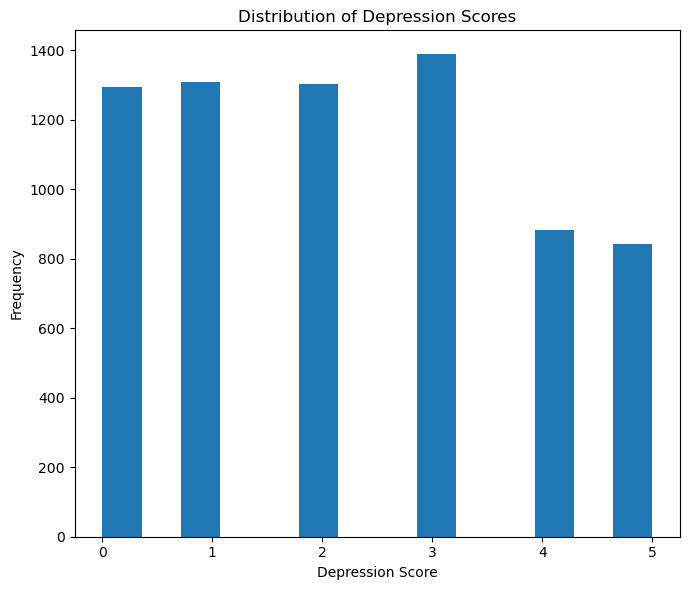

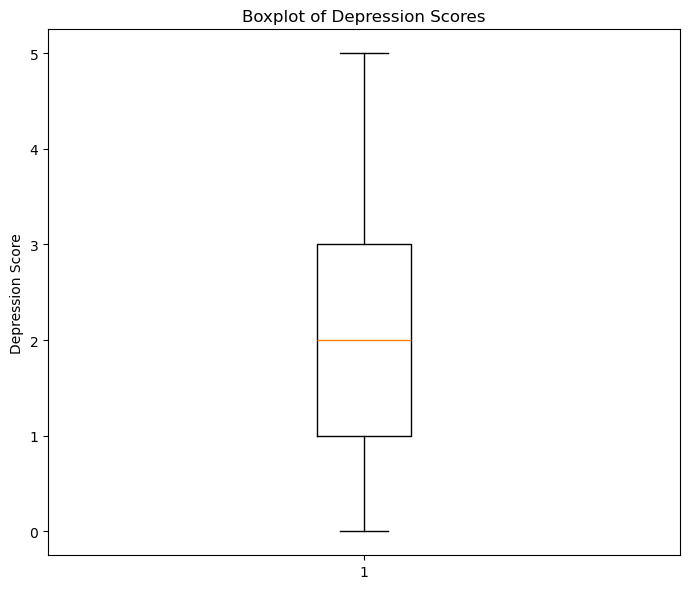

In [7]:
col_y = 'Depression_Score'
plt.figure(figsize=(7, 6))  # Create a standalone figure for the histogram
plt.hist(df[col_y], bins=14)  # Plotting a histogram to visualize the distribution of depression scores. I set the number of bins to 14 for better granularity.

# Adding titles and labels for clarity of the histogram.
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the histogram


plt.figure(figsize=(7, 6))  # Create a standalone figure for the boxplot

plt.boxplot(df[col_y], vert=True)  # Plotting a boxplot to visualize the spread and identify any outliers
# in the depression scores.

# Adding titles and labels for clarity of the box plot.
plt.title('Boxplot of Depression Scores')
plt.ylabel('Depression Score')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the boxplot


#### Analysis: The histogram shows that depression scores range from 0 to 5, with most students scoring between 0 and 3. Score 3 is the most common, while higher scores like 4 and 5 appear much less often. This suggests that fewer students report higher levels of depression. Overall, the distribution is slightly right-skewed, meaning there are fewer people at the higher end of the scale.

#### The boxplot further supports this pattern. The median score is around 2, which means about half of the students have a depression score of 2 or lower. The middle 50% of scores fall between roughly 1 and 3, showing moderate variation across the group. Scores range from 0 to 5, and there are no outliers, indicating that all values fall within the expected range.

#### Overall, most students show low to moderate levels of depression rather than severe symptoms. However, the clustering of scores in the middle range suggests that many students may still be vulnerable, highlighting the importance of early support and monitoring. Additionally, because most scores fall within a narrow range, this limited variability could weaken correlations between depression and other variables in the dataset.



### 2.3.1.2 Understanding distribution of features

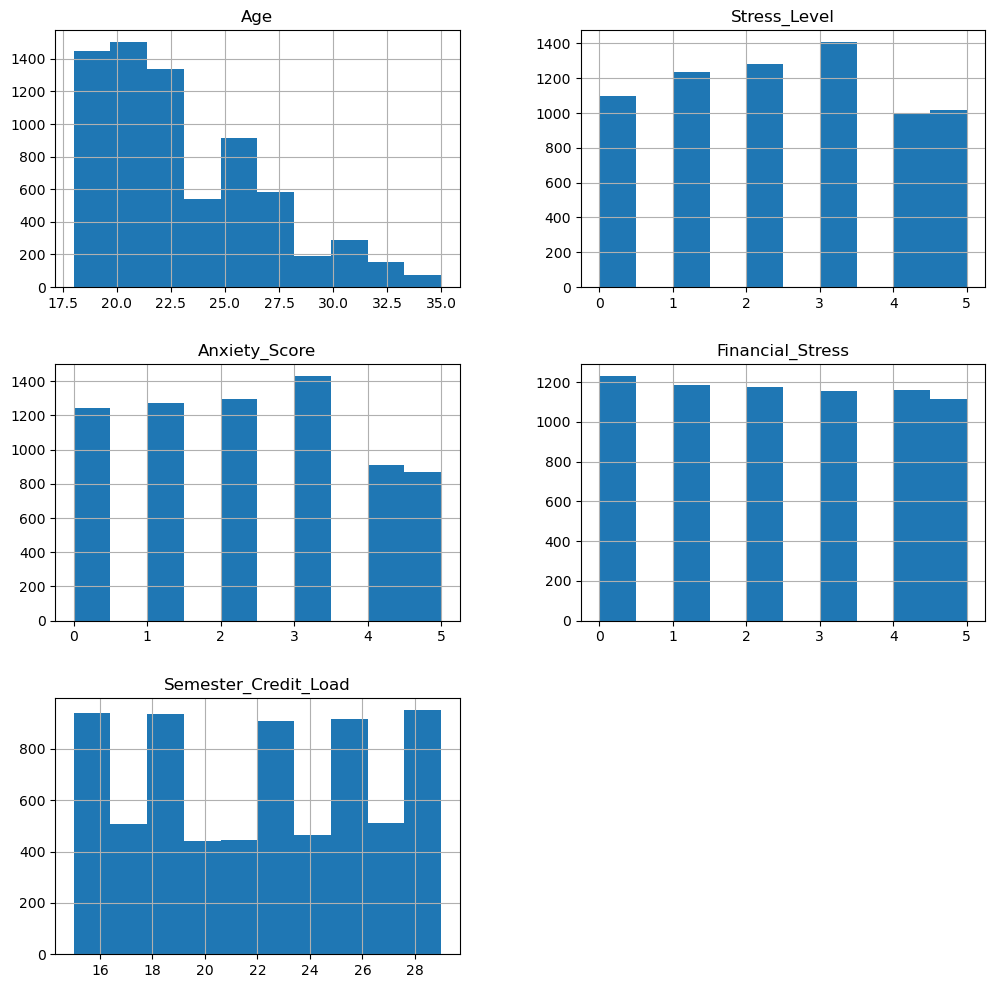

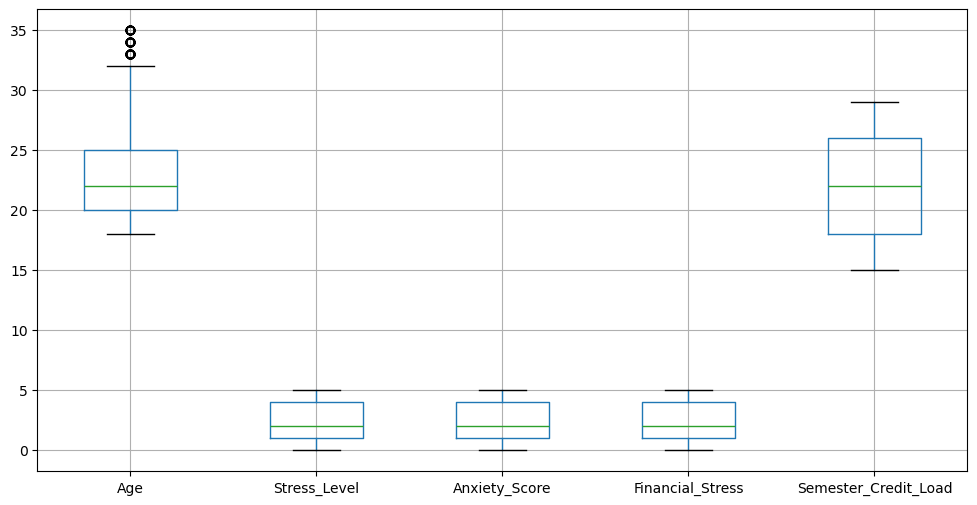

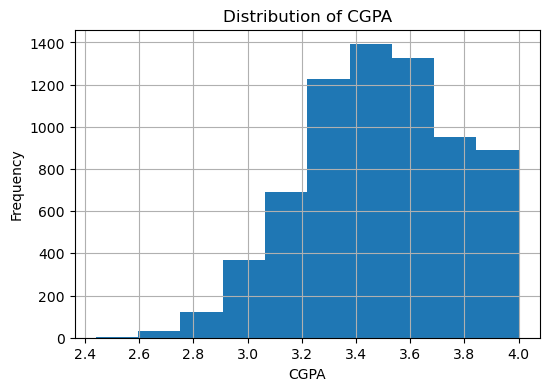

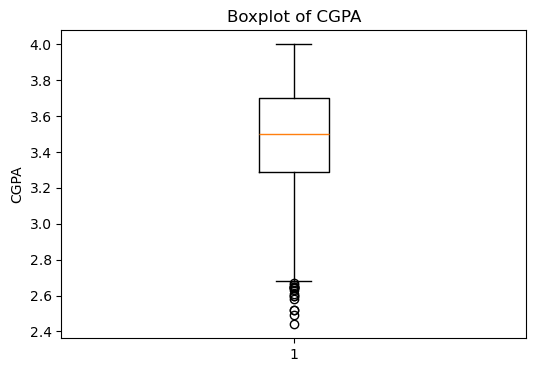

In [8]:
df = df.drop(columns=['ID']) # Storing the DataFrame after dropping the 'ID' column as it is not useful for analysis.

features = df.drop(columns=[col_y, 'CGPA']) # Dropping target variable and CGPA from features for visualization due to scale issue with CGPA.
num_features = features.select_dtypes(include='number') # Selecting only numerical features for visualization.
col_cgpa = df['CGPA'] # Storing CGPA column separately for individual visualization.

# Plotting histograms for all numerical features to visualize their distributions.
num_features.hist(figsize=(12, 12)) 
plt.show()

plt.figure(figsize=(12, 6))
features.boxplot()
plt.show()

# Seperate CGPA histogram due to scale issues
col_cgpa.hist(figsize=(6,4))
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Seperate CGPA boxplot due to scale issues
plt.figure(figsize=(6,4))
plt.boxplot(col_cgpa.dropna(), vert=True)
plt.title('Boxplot of CGPA')
plt.ylabel('CGPA')
plt.show()


### Analysis
### The histograms and boxplots summarize the main numeric features in the dataset: Age, Stress Level, Anxiety Score, Financial Stress, Semester Credit Load, and CGPA. Together, these variables reflect students’ demographics, mental well-being, academic workload, and performance.

### 1. Age
### Most students fall between 18 and 25 years old, with a strong concentration around ages 20–22. This suggests that the dataset is largely made up of traditional undergraduate students. The distribution is right-skewed, meaning older students are less common. The boxplot shows a few outliers between 30 and 35 years, indicating the presence of mature or returning students. While they make up a small portion of the sample, their experiences may differ from younger students, especially in terms of stress and financial responsibilities. Overall, the median age of about 22 confirms that this is a relatively young population.

### 2. Stress Level
### Stress levels range from 0 to 5 and are fairly evenly spread, with a slight peak around levels 2–3. This suggests that most students experience moderate stress rather than extremely low or high stress. The boxplot shows a median stress level near 2, with no clear outliers. This indicates that stress is consistently present across the student population, even if it does not usually reach extreme levels. This pattern reflects the typical academic environment, where deadlines, exams, and workloads create ongoing pressure for many students.

### 3. Anxiety Score
### Anxiety scores also range from 0 to 5, with most students scoring between 1 and 3. Very low and very high anxiety levels appear less frequently. The median score is around 2, showing that mild to moderate anxiety is common The lack of major outliers suggests that anxiety is fairly widespread but not extreme for most students. Combined with the stress results, this indicates that many students may be quietly struggling with mental well-being, even if severe cases are rare.

### 4. Financial Stress
### Financial stress spans the full scale from 0 to 5, with more students clustered around mid-range values. Slightly higher scores appear more often than the lowest ones, suggesting that financial pressure is a common concern.The median financial stress score is around 2, with moderate variability and no extreme outliers. This implies that while most students are not experiencing severe financial hardship, many still face ongoing money-related worries, which could contribute to overall stress and anxiety levels.

### 5. Semester Credit Load
### Semester credit loads range roughly from 15 to 29 credits, with most students taking between 18 and 22 credits. This aligns with a typical full-time academic workload. The median is around 22 credits, and the spread indicates noticeable variation in how heavy students’ course loads are. A small group of students is taking much heavier credit loads, which may increase their risk of academic burnout, stress, and reduced well-being, especially when combined with financial or emotional pressures.

### 6. CGPA
### CGPA values range from about 2.4 to 4.0, with most students concentrated between 3.2 and 3.8. The distribution is slightly left-skewed, meaning many students perform relatively well academically. The median CGPA is around 3.5, suggesting generally strong academic outcomes. However, a few lower-end outliers indicate that some students may be academically at risk. These students could potentially overlap with those experiencing higher stress, anxiety, or heavier workloads.

### Overall, the data shows a population of mostly young students who generally perform well academically but experience moderate levels of stress, anxiety, and financial pressure. While extreme mental health concerns are uncommon, many students fall into a vulnerable middle range. This highlights the importance of early support systems, academic advising, and mental health resources. Additionally, the limited variability in some variables (such as stress and anxiety) may weaken correlations with academic performance, potentially masking deeper relationships within the data.

### Further Analysis Of Numeric Features With Target Variable

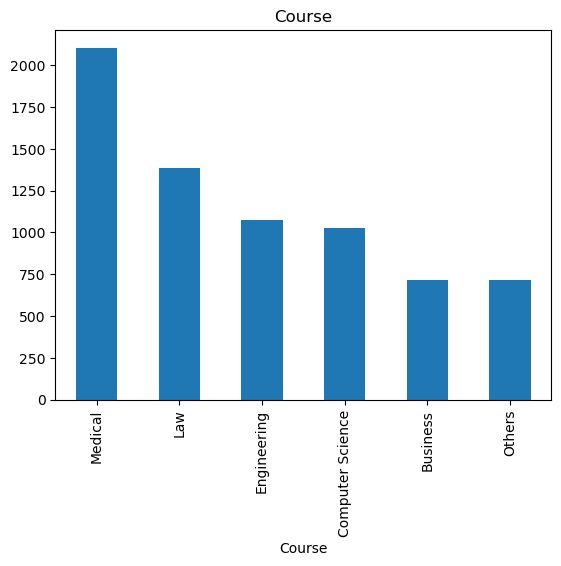

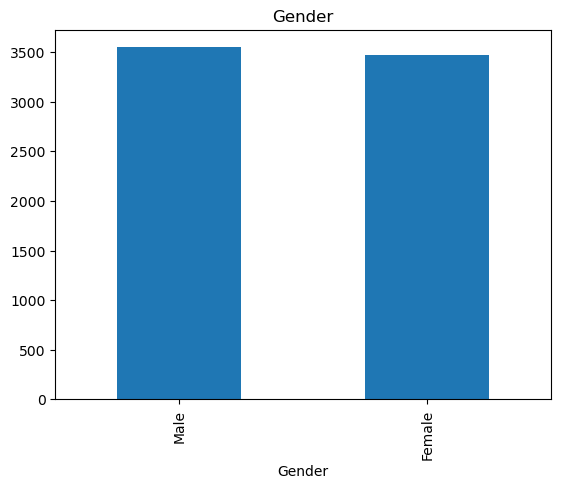

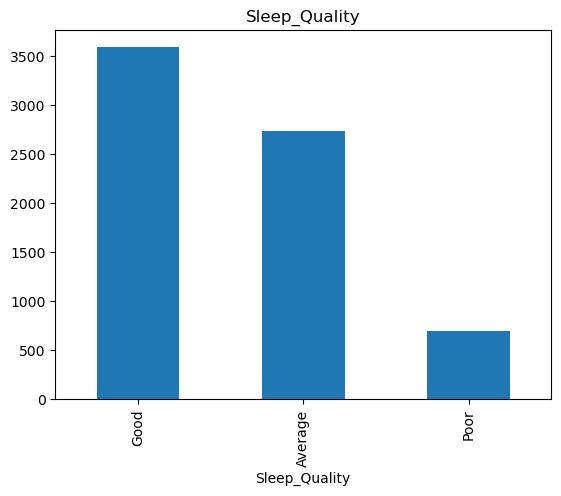

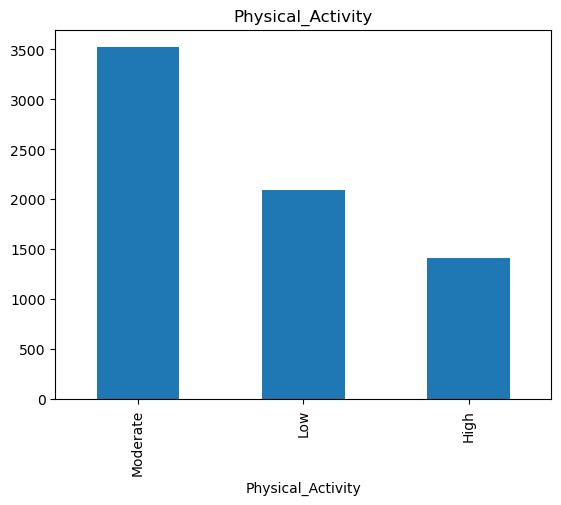

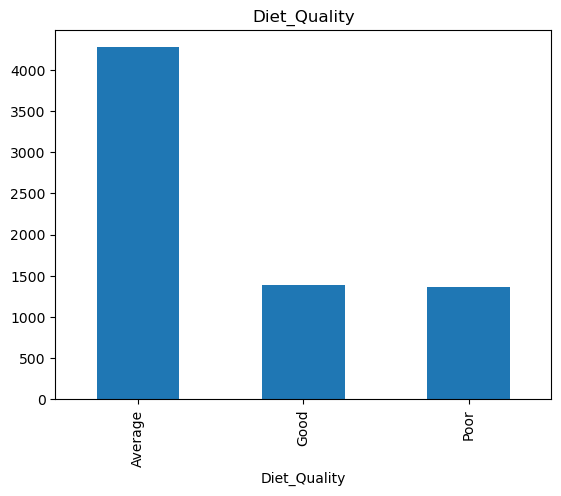

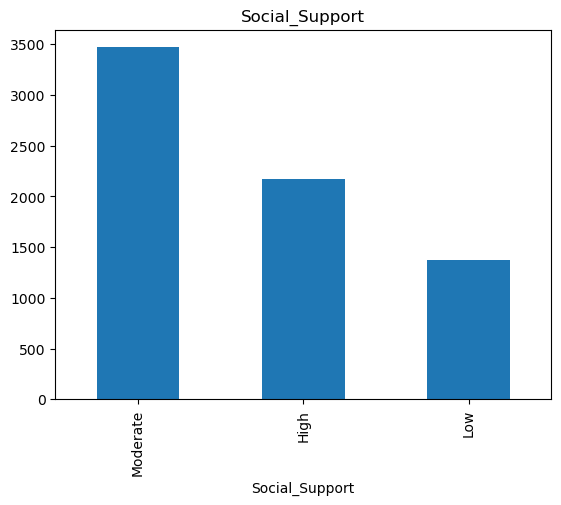

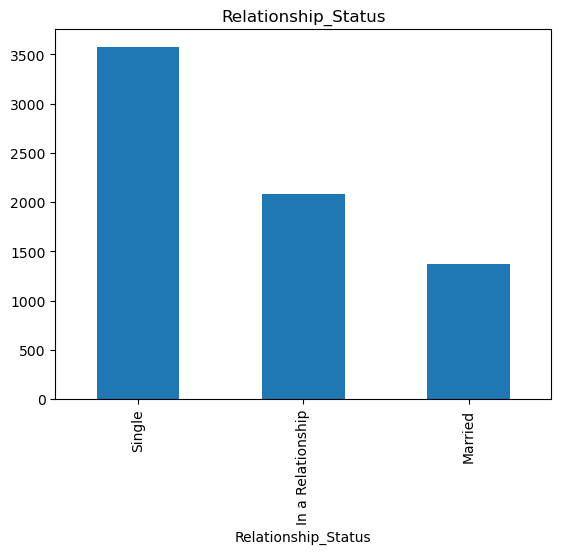

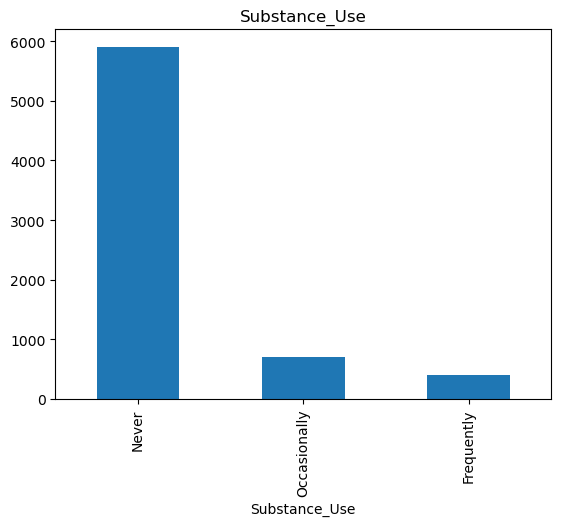

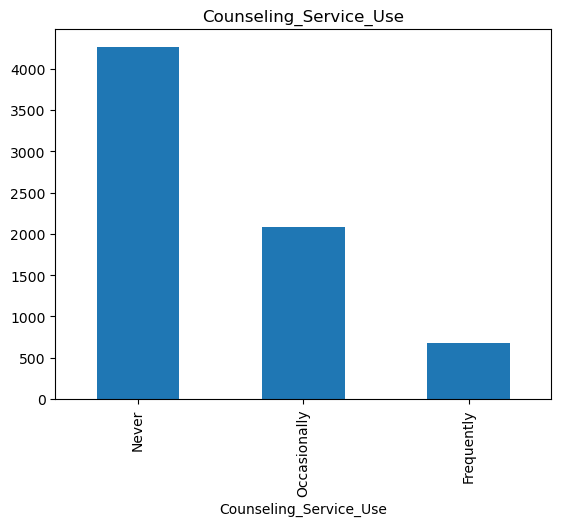

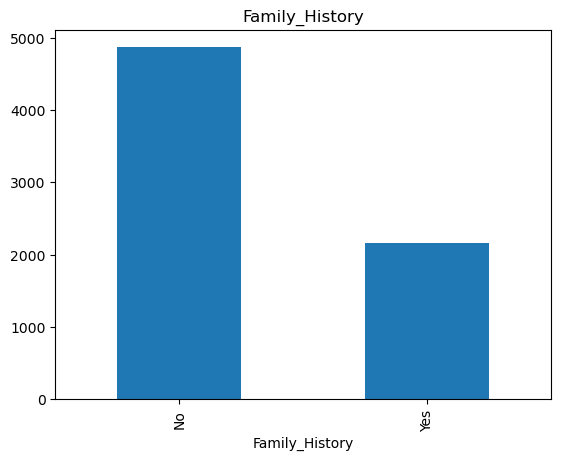

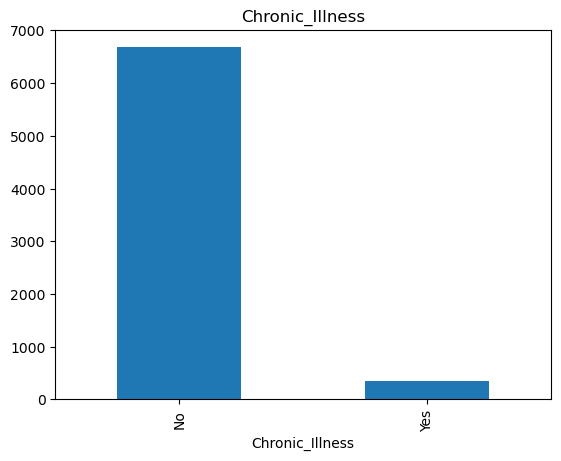

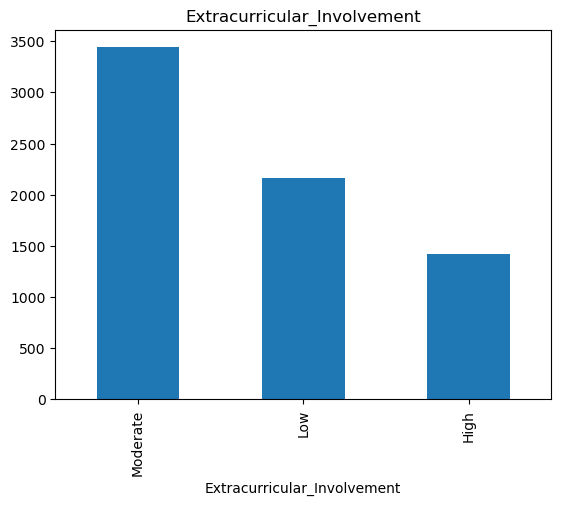

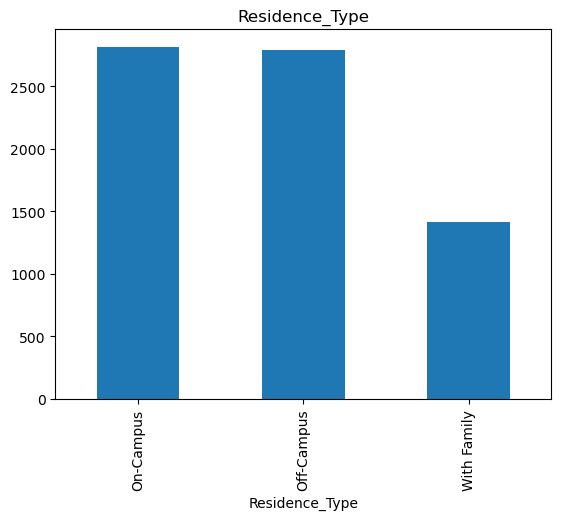

In [9]:
cat_features = df.select_dtypes(include='object')

for col in cat_features:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### Analysis
### The bar charts summarize all categorical features in the dataset, including Course, Gender, Sleep Quality, Physical Activity, Diet Quality, Social Support, Relationship Status, Substance Use, Counseling Service Use, Family History of Mental Health Issues, Chronic Illness, Extracurricular Involvement, and Residence Type. Together, these variables capture students’ lifestyle habits, social environments, and health-related characteristics, all of which may influence mental well-being.

### 1. Course
### Medical students form the largest group in the dataset, followed closely by Law, Engineering, and Computer Science students. Business and “Other” programs appear less frequently, with “Other” likely representing fields such as arts, social sciences, education, and specialized programs.

### This distribution suggests that the sample is heavily weighted toward academically demanding disciplines. These fields are typically associated with high workloads, competitive environments, and strong performance expectations. As a result, observed levels of stress, anxiety, and depression may be partly driven by academic pressure, making course type a potential confounding factor when interpreting mental health outcomes.

### 2. Gender
### Male and female students are almost evenly represented. This balanced distribution strengthens the validity of comparisons across mental health variables, as outcomes are less likely to be influenced by gender-based sampling bias. Any differences observed in stress or anxiety are therefore more likely to reflect genuine patterns rather than dataset imbalance.

### 3. Sleep Quality
### Most students report average or good sleep quality, while a smaller group experiences poor sleep. Although severe sleep problems are not widespread, a sizable portion of students are not achieving optimal rest. Given the strong relationship between sleep and mental health, this pattern suggests that suboptimal sleep may contribute to moderate levels of stress and depression observed across the population.

### 4. Physical Activity
### The majority of students engage in moderate physical activity, with fewer reporting high activity levels. This indicates that while most students are not completely inactive, many are not exercising enough to gain strong mental health benefits. Since physical activity is known to reduce stress and anxiety, the predominance of moderate-to-low activity may help explain why mental health challenges persist despite generally strong academic performance.

### 5. Diet Quality
### Most students describe their diet as average, while good and poor diet quality appear in smaller but similar proportions. This suggests that nutritional habits are generally suboptimal. An average diet may not provide sufficient support for managing academic stress, implying that diet likely acts as a background risk factor rather than a primary driver of mental health outcomes.

### 6. Social Support
### Most students report moderate social support, with fewer experiencing high support and a smaller but noticeable group reporting low support. This indicates that many students have some social connections but may lack strong emotional or psychological support. Students in the low-support category may be particularly vulnerable to stress and depression, highlighting the importance of peer networks and institutional support systems.

### 7. Relationship Status
### Most students are single, followed by those in relationships, with very few married. This is expected in a young, undergraduate-dominated population. Relationship status may influence mental health indirectly through emotional support availability. Single students may rely more heavily on friends or campus resources, making social support especially important for this group.

### 8. Substance Use
### The majority of students report never using substances, while occasional use is reported by a small group and frequent use is rare. This suggests that substance use is not a major coping strategy in this population. Consequently, mental health challenges are more likely related to academic, social, and lifestyle pressures rather than substance-related behaviors.

### 9. Counseling Service Use
### Most students have never accessed counseling services, with only a small proportion reporting occasional or frequent use. This indicates possible underutilization of mental health resources despite widespread moderate stress and anxiety. Factors such as stigma, lack of awareness, or limited access may contribute to this pattern, highlighting a gap between student needs and service uptake.

### 10. Family History of Mental Health Issues
### Most students report no family history of mental health problems, though a notable minority do. Family history is a known risk factor, suggesting that these students may be more vulnerable to developing mental health difficulties, especially when combined with academic pressure or poor sleep.

### 11. Chronic Illness
### Only a small proportion of students report having a chronic illness. While this variable does not appear to strongly influence population-level trends, it may significantly affect mental well-being for affected individuals, making it more relevant for subgroup analysis.

### 12. Extracurricular Involvement
### Most students show moderate involvement in extracurricular activities, with fewer reporting high involvement and a sizeable group reporting low involvement. Moderate participation may help relieve stress and promote balance, while low involvement could reflect time constraints or academic pressure, potentially contributing to sustained stress levels.

### 13. Residence Type
### Most students live either on-campus or off-campus, with fewer living with family. Living away from home may encourage independence but can also reduce access to familial support. This reinforces the importance of social connections and institutional resources, particularly for students who are geographically separated from their families.

### Overall, the categorical variables reveal a student population facing moderate academic and lifestyle pressures, with limited engagement in counseling services and generally average health behaviors. While severe risk factors are uncommon, many students fall into a middle ground of moderate stress, average sleep and diet, and limited support. This suggests that mental health challenges in this dataset are more likely driven by cumulative academic and lifestyle factors rather than extreme individual conditions, emphasizing the need for preventative strategies and accessible campus-based support.

### 2.3.2 Understanding relationship between variables

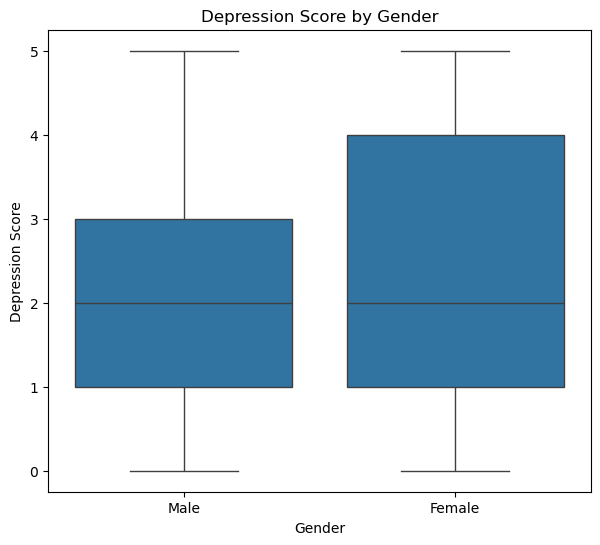

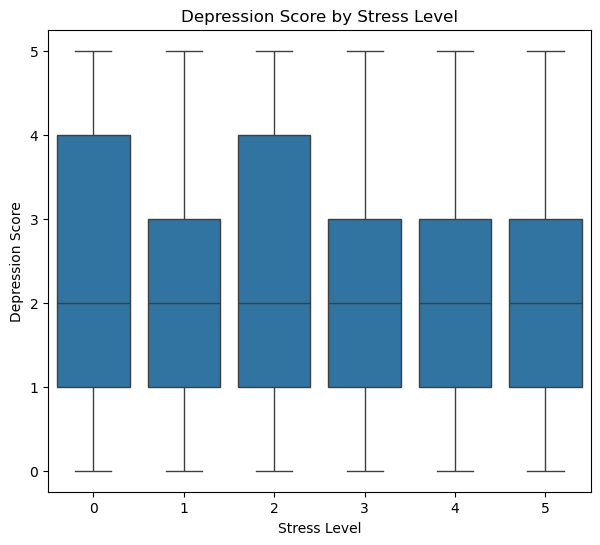

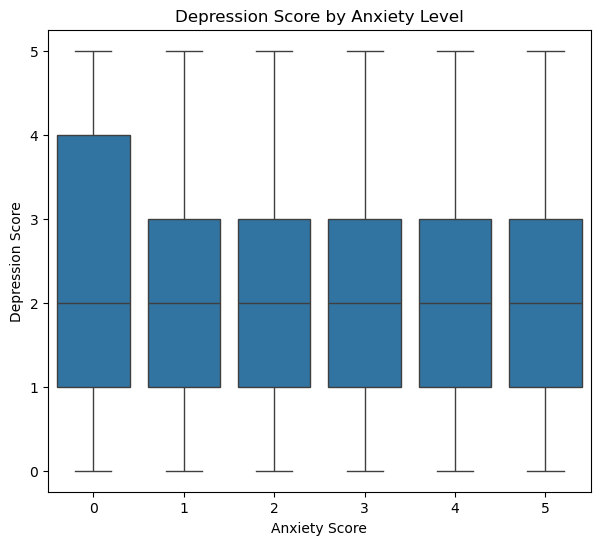

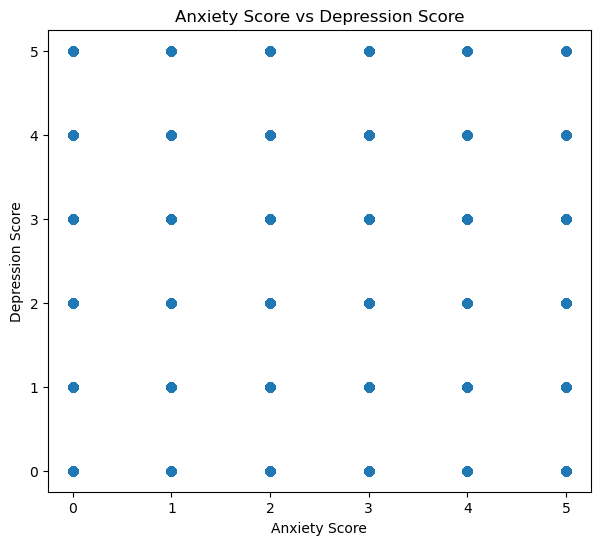

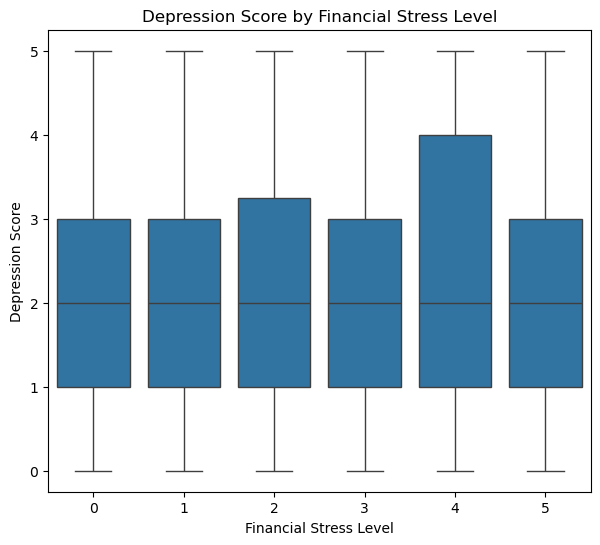

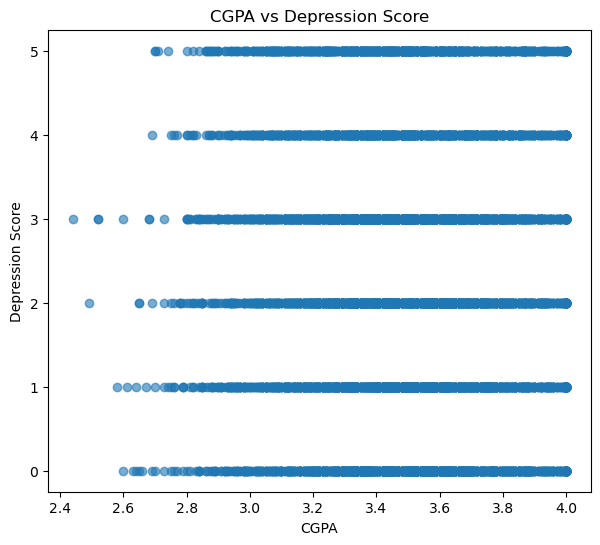

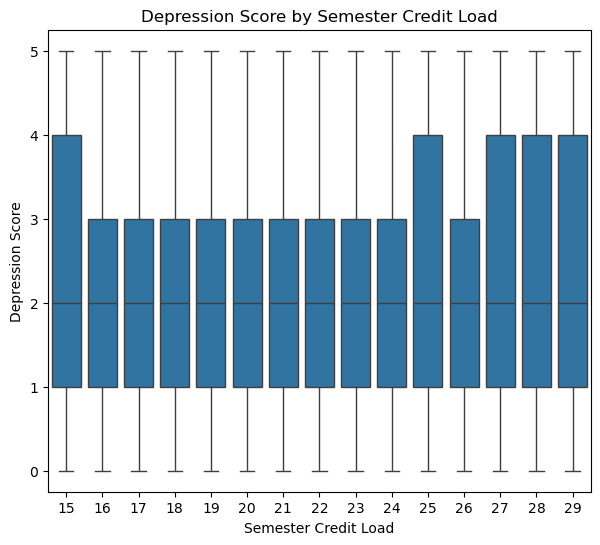

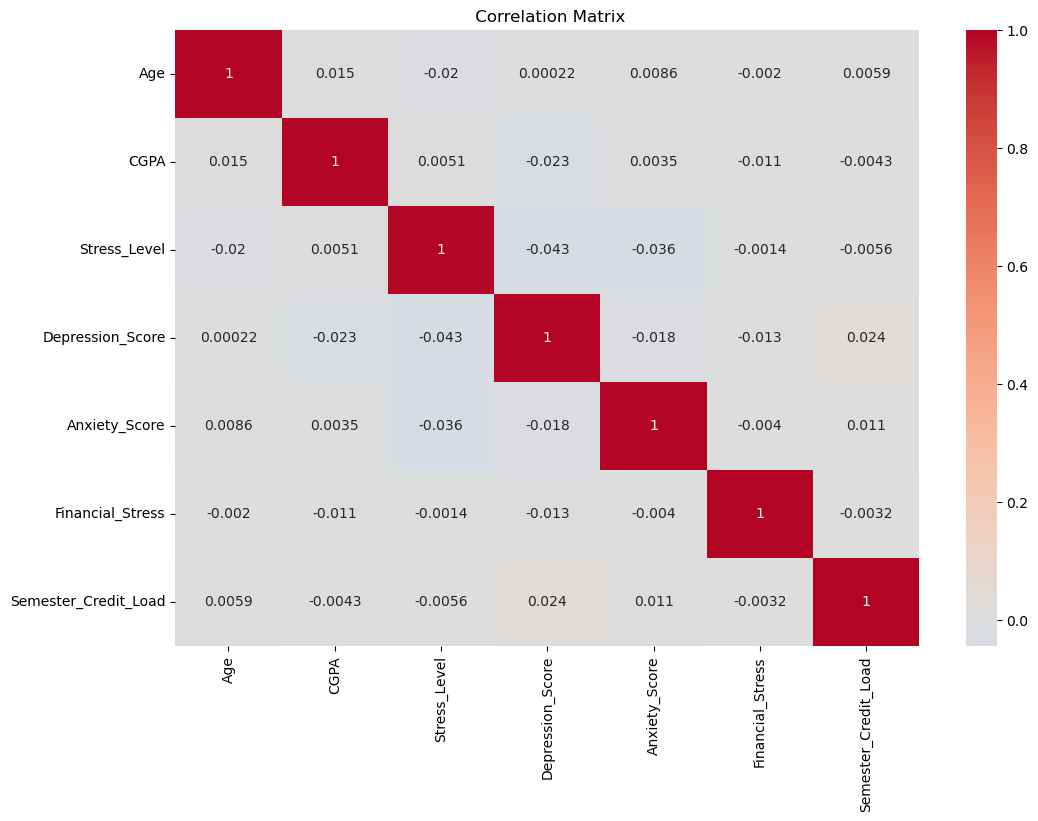

In [10]:
# Visualizing Depression Score against various features using boxplots and scatter plots.
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Depression_Score', data=df)
plt.title('Depression Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Depression Score')
plt.show()

# Boxplot for Stress Level vs Depression Score
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Stress_Level',
    y='Depression_Score',
    data=df,
    order=sorted(df['Stress_Level'].dropna().unique())
)
plt.title('Depression Score by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Depression Score')
plt.show()

# Boxplot for Anxiety Score vs Depression Score
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Anxiety_Score',
    y='Depression_Score',
    data=df,
    order=sorted(df['Anxiety_Score'].dropna().unique())
)
plt.title('Depression Score by Anxiety Level')
plt.xlabel('Anxiety Score')
plt.ylabel('Depression Score')
plt.show()

# Scatter plot for Anxiety Score vs Depression Score
plt.figure(figsize=(7,6))
plt.scatter(
    df['Anxiety_Score'],
    df['Depression_Score'],
    alpha=0.6
)
plt.title('Anxiety Score vs Depression Score')
plt.xlabel('Anxiety Score')
plt.ylabel('Depression Score')
plt.show()

# Boxplot for Financial Stress vs Depression Score
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Financial_Stress',
    y='Depression_Score',
    data=df,
    order=sorted(df['Financial_Stress'].dropna().unique())
)
plt.title('Depression Score by Financial Stress Level')
plt.xlabel('Financial Stress Level')
plt.ylabel('Depression Score')
plt.show()

# Scatter plot for CGPA vs Depression Score
plt.figure(figsize=(7,6))
plt.scatter(
    df['CGPA'],
    df['Depression_Score'],
    alpha=0.6
)
plt.xlabel('CGPA')
plt.ylabel('Depression Score')
plt.title('CGPA vs Depression Score')
plt.show()

# Boxplot for Semester Credit Load vs Depression Score
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Semester_Credit_Load',
    y='Depression_Score',
    data=df,
    order=sorted(df['Semester_Credit_Load'].dropna().unique())
)
plt.title('Depression Score by Semester Credit Load')
plt.xlabel('Semester Credit Load')
plt.ylabel('Depression Score')
plt.show()

# Correlation matrix using heatmap
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title(' Correlation Matrix')
plt.show()


### Analysis
### Depression Score by Gender
### The boxplot comparing depression scores between male and female students shows very similar distributions. Both groups have a median score of about 2, with overlapping interquartile ranges and comparable overall spreads. This suggests that depression levels are largely similar across genders in this sample, indicating that gender alone does not appear to play a major role in explaining differences in depression scores.

### Depression Score by Stress Level
### When depression scores are compared across stress levels, the medians remain fairly consistent, and the distributions overlap substantially. Although there is some variability within each stress category, there is no clear upward or downward trend as stress levels increase. This suggests that reported stress, on its own, does not show a strong direct relationship with depression severity in this dataset.

### Depression Score by Anxiety Level
### A similar pattern appears when looking at anxiety levels. Depression scores vary widely at every anxiety category, and median values remain relatively stable. The heavy overlap between groups indicates that students with similar anxiety levels can experience very different levels of depression. Overall, anxiety alone does not seem to strongly determine depression severity here.

### Anxiety Score vs Depression Score
### The scatterplot between anxiety and depression scores forms a grid-like pattern, reflecting the discrete scoring scale. Depression scores appear across all anxiety levels, with no obvious linear or consistent trend. This reinforces the idea that higher anxiety does not necessarily correspond to higher depression in this sample, highlighting the complexity of mental health experiences among students.

### Depression Score by Financial Stress Level
### Depression scores across financial stress levels also show similar medians and overlapping ranges. While there is slightly more variation at higher financial stress levels, there is no clear pattern indicating that increased financial stress leads to higher depression scores. This suggests that financial stress alone does not strongly explain differences in depression severity.

### CGPA vs Depression Score
### The scatterplot comparing CGPA and depression score shows horizontal banding due to the limited range of depression values. Students with both high and low CGPAs display the full range of depression scores. This indicates no meaningful relationship between academic performance and depression severity, suggesting that doing well academically does not necessarily protect against depressive symptoms.

### Depression Score by Semester Credit Load
### Depression scores remain remarkably consistent across different semester credit loads. Median values and variability are similar for all categories, and no workload threshold appears to trigger higher depression levels. This suggests that academic load alone is not a strong predictor of depression among these students.

### Heatmap Correlation Between Numeric Features
### The correlation heatmap supports these observations, showing generally weak relationships between depression scores and other numerical variables. Most correlations are close to zero, indicating that no single factor—such as stress, anxiety, CGPA, or credit load—strongly explains depression on its own. This highlights the multifaceted nature of mental health, where depression is likely influenced by a combination of academic, social, and personal factors rather than any single variable.

# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
# For numeric features, missing values are filled with the median of each column
num_features = df.select_dtypes(include=['number']).columns
df[num_features] = df[num_features].fillna(df[num_features].median())

# For categorical features, missing values are filled with the mode
cat_features = df.select_dtypes(include=['object']).columns
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])

# Check for remaining missing values
df.isna().sum()

# ID column has already been removed earlier in the code therefore, it is not included in data cleaning.

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

## 3.2 Train-Test Split

#### Additional Configurations (Configurations) Of Categorial Features Of Base Model

In [12]:
df_base = df.copy() # Copy of the original DataFrame to preserve it for baseline model training.
Y_base = df_base[col_y] # Storing the target variable (Depression Score) separately.
X_base = df_base.drop(col_y, axis=1) # Dropping the target variable from the features DataFrame.
X_base = pd.get_dummies(X_base, drop_first=True) # Converting categorical variables into dummy/indicator variables.
X_base # Display the ohe-features DataFrame after preprocessing.

,Age,CGPA,Stress_Level,Anxiety_Score,Financial_Stress,Semester_Credit_Load,Course_Computer Science,Course_Engineering,Course_Law,Course_Medical,...,Substance_Use_Never,Substance_Use_Occasionally,Counseling_Service_Use_Never,Counseling_Service_Use_Occasionally,Family_History_Yes,Chronic_Illness_Yes,Extracurricular_Involvement_Low,Extracurricular_Involvement_Moderate,Residence_Type_On-Campus,Residence_Type_With Family
0,25,3.56,3,2,2,17,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
1,24,2.44,0,0,3,27,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
2,19,3.74,4,3,4,15,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
3,19,3.65,2,0,4,20,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
4,18,3.40,3,4,0,23,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,3.69,3,5,1,26,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
7018,24,3.73,3,1,3,15,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
7019,26,3.65,4,1,4,17,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
7020,24,3.65,4,4,4,18,False,False,False,True,...,True,False,True,False,False,True,False,True,False,False


In [13]:
test_size = 0.3 # Setting the test size to 30% of the dataset.
random_state = 2026 # Setting a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X_base, Y_base, test_size=test_size, random_state=random_state) # Splitting the dataset into training and testing sets.

# 4. Modelling

### 4.2 Train Model

In [14]:
## Initialise and train multiple different machine learning regression models on the training data.
linr = LinearRegression(fit_intercept=True)
linr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# 5. Model Evaluation

### Model 1: Linear Regression

In [15]:
# Predictions for Linear Regression
y_pred_linr = linr.predict(X_test)

# Evaluation 
print("Evaluation Metrics For Linear Regression")
print("Predictions:", y_pred_linr)
print("MAE:", mean_absolute_error(y_test, y_pred_linr))
print("MSE:", mean_squared_error(y_test, y_pred_linr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_linr))
print("R^2:", r2_score(y_test, y_pred_linr))


Evaluation Metrics For Linear Regression
Predictions: [1.95851034 2.27630202 1.91963936 ... 2.0832081  2.01262206 2.12740929]
MAE: 1.3250132743421332
MSE: 2.5044755854825143
RMSE: 1.5825535016177223
R^2: 0.04277123351743872


### Analysis
### Linear Regression serves as the baseline model due to its simplicity and interpretability. The low R² score indicates that the model explains only ~4% of the variance in depression scores, suggesting weak linear relationships between features and the target variable. However, the MAE and RMSE are relatively low, indicating that predictions remain close to the mean target value.

#### Model 2: Decision Tree Regressor

In [16]:
# Predictions for Decision Tree Regression
y_pred_dtr = dtr.predict(X_test)

print("Evaluation Metrics For Decision Tree Regression")
print("Predictions:", y_pred_dtr)
print("MAE:", mean_absolute_error(y_test, y_pred_dtr))
print("MSE:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_dtr))
print("R^2:", r2_score(y_test, y_pred_dtr))


Evaluation Metrics For Decision Tree Regression
Predictions: [1. 0. 3. ... 1. 0. 3.]
MAE: 1.8571428571428572
MSE: 5.3398196487897485
RMSE: 2.3108049785279907
R^2: -1.0409178693053946


### Analysis
### The Decision Tree performs significantly worse than the baseline, with a negative R² score, meaning it performs worse than simply predicting the mean of the target variable. High error values indicate overfitting and poor generalization.

#### Model 3: Random Forest Regressor

In [17]:
# Predictions for Random Forest Regression
y_pred_rfr = rfr.predict(X_test)

# Evaluation
print("Evaluation Metrics For Random Forest Regression")
print("Predictions:", y_pred_rfr)
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("MSE:", mean_squared_error(y_test, y_pred_rfr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rfr))
print("R^2:", r2_score(y_test, y_pred_rfr))

Evaluation Metrics For Random Forest Regression
Predictions: [2.1  2.14 2.23 ... 2.06 2.31 1.58]
MAE: 1.340280018984338
MSE: 2.553527432368296
RMSE: 1.5979760424888403
R^2: 0.02402326122322207


### Model 4: Gradient Boosting Regressor

### Analysis
### Random Forest improves stability compared to a single Decision Tree but does not significantly outperform the baseline. While ensemble averaging reduces overfitting, the model still struggles to capture meaningful signal in the data.

In [18]:
# Predictions for Gradient Boosting Regression
y_pred_gbr = gbr.predict(X_test)

# Evaluation
print("Evaluation Metrics For Gradient Boosting Regression")
print("Predictions:", y_pred_gbr)
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_gbr))
print("R^2:", r2_score(y_test, y_pred_gbr))

Evaluation Metrics For Gradient Boosting Regression
Predictions: [1.91442322 1.92593452 2.03007489 ... 1.98865755 2.07093522 2.09860766]
MAE: 1.332164903710678
MSE: 2.527143064132209
RMSE: 1.5896990482893953
R^2: 0.03410755847389202


### Analysis
### Gradient Boosting demonstrates competitive error metrics close to Linear Regression but does not significantly improve explanatory power. Despite its ability to model nonlinear relationships, gains remain marginal due to dataset limitations and inherent noise in mental health data.

In [19]:
print(X_base.columns, '\n') # For reference

new_data = [ # New data manually inputted for prediction
    21,  # Age
    3.45,  # CGPA
    3,  # Stress_Level
    4,  # Anxiety_Score
    2,  # Financial_Stress
    18,  # Semester_Credit_Load
    # Courses
    1, 0, 0, 0, 0,  # Computer Science=1, others=0
    # Gender
    1,  # Male=1
    # Sleep_Quality
    1, 0,  # Good=1, Poor=0
    # Physical_Activity
    0, 1,  # Low=0, Moderate=1
    # Diet_Quality
    1, 0,  # Good=1, Poor=0
    # Social_Support
    0, 0,  # Low=0, Moderate=0 (High implicitly)
    # Relationship_Status
    0, 1,  # Married=0, Single=1
    # Substance_Use
    1, 0,  # Never=1, Occasionally=0
    # Counseling_Service_Use
    1, 0,  # Never=1, Occasionally=0
    # Family_History
    0,  # No=0
    # Chronic_Illness
    0,  # No=0
    # Extracurricular_Involvement
    0, 1,  # Low=0, Moderate=1
    # Residence_Type
    1, 0  # On-Campus=1, With Family=0
]

# Predicting depression score for the new data using all trained models
new_data_df = pd.DataFrame([new_data], columns=X_base.columns)
new_prediction_linr = linr.predict(new_data_df)
new_prediction_dtr = dtr.predict(new_data_df)
new_prediction_rfr = rfr.predict(new_data_df)
new_prediction_gbr = gbr.predict(new_data_df)

print("Prediction for new data (Linear Regression):", new_prediction_linr)
print("Prediction for new data (Decision Tree Regression):", new_prediction_dtr)
print("Prediction for new data (Random Forest Regression):", new_prediction_rfr)
print("Prediction for new data (Gradient Boosting Regression):", new_prediction_gbr)


Index(['Age', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Financial_Stress',
       'Semester_Credit_Load', 'Course_Computer Science', 'Course_Engineering',
       'Course_Law', 'Course_Medical', 'Course_Others', 'Gender_Male',
       'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Physical_Activity_Low',
       'Physical_Activity_Moderate', 'Diet_Quality_Good', 'Diet_Quality_Poor',
       'Social_Support_Low', 'Social_Support_Moderate',
       'Relationship_Status_Married', 'Relationship_Status_Single',
       'Substance_Use_Never', 'Substance_Use_Occasionally',
       'Counseling_Service_Use_Never', 'Counseling_Service_Use_Occasionally',
       'Family_History_Yes', 'Chronic_Illness_Yes',
       'Extracurricular_Involvement_Low',
       'Extracurricular_Involvement_Moderate', 'Residence_Type_On-Campus',
       'Residence_Type_With Family'],
      dtype='object') 

Prediction for new data (Linear Regression): [3.39225748]
Prediction for new data (Decision Tree Regression): [4.]
Prediction 

## Model Choosen: Linear Regression
### After comparing the performance of Linear Regression, Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression, Linear Regression was selected as the final baseline model. It achieved the lowest RMSE (1.5826) and MAE (1.3250), as well as the highest R² value (0.0428), indicating slightly better predictive accuracy and consistency compared to the other models. Although the improvements were modest, Linear Regression showed the most stable overall performance across all evaluation metrics. In contrast, the Decision Tree model performed poorly, with substantially higher error values and a negative R² score, suggesting overfitting and weak generalisation to unseen data.

### While ensemble methods such as Random Forest and Gradient Boosting are typically strong performers due to their ability to model complex and non-linear relationships, they did not provide meaningful improvements in this case. This suggests that the relationships within the dataset are relatively simple or weak, limiting the benefits of more sophisticated models. Additionally, the engineered features may not have introduced strong new predictive signals, and the ensemble models may have been affected by noise or redundancy in the feature set. Another contributing factor is the relatively small size of the dataset, which restricts the models’ ability to learn complex patterns reliably. The inherent variability and subjectivity in mental health outcomes further reduce predictive performance, making it difficult for even advanced models to outperform simpler approaches. As a result, the simpler Linear Regression model was better suited to this dataset, providing comparable or better accuracy while remaining more interpretable.

### Overall, model performance was limited across all approaches, as reflected by low R² values (approximately 0.03–0.04). This indicates that the available features explain only a small portion of the variability in the target variable, highlighting the inherent difficulty of predicting psychological outcomes using the current dataset. Factors influencing mental health are complex and may depend on variables not captured in the survey, such as life events, personal coping mechanisms, or environmental influences. Despite this limitation, Linear Regression offered the best balance between simplicity, stability, and predictive performance. Based on these results, Linear Regression was chosen for further optimisation through hyperparameter tuning. This decision was guided by its consistently lower error metrics, reduced risk of overfitting, computational efficiency, and ease of interpretation, making it the most appropriate model for this study.

# Iterative Model Deployment

### Feature Engineering 

In [20]:
df_fe = df.copy()

# Feature Engineered Columns
# 1. Psychological_Score: A combined score derived from Stress_Level, Anxiety_Score, and Financial_Stress to capture overall psychological well-being.
df_fe['Psychological_Score'] = df_fe['Stress_Level'] + df_fe['Anxiety_Score'] + df_fe['Financial_Stress'] / 3

# 2. Academic_Stress_Index: A weighted index combining Semester_Credit_Load and CGPA to assess academic pressure.
df_fe['Academic_Stress_Index'] = (df_fe['Semester_Credit_Load'] / df_fe['CGPA']) * 10  # Scaling factor of 10 for better interpretability

# 3. Social_Isolation: A binary indicator derived from Social_Support, Relationship_Status, and Extracurricular_Involvement to identify students at risk of social isolation.
df_fe["Social_Isolation"] = (
    (df_fe["Social_Support"] == "Low").astype(int) +
    (df_fe["Relationship_Status"] == "Single").astype(int) +
    (df_fe["Extracurricular_Involvement"] == "Low").astype(int)
)

df_fe.drop(columns=['Stress_Level', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load', 'CGPA', "Social_Support", "Relationship_Status", "Extracurricular_Involvement"], inplace=True)
df_fe # Display the DataFrame with the new feature engineered columns.

,Age,Course,Gender,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Residence_Type,Psychological_Score,Academic_Stress_Index,Social_Isolation
0,25,Others,Male,3,Good,Moderate,Good,Never,Never,No,No,On-Campus,5.666667,47.752809,0
1,24,Engineering,Female,3,Average,Low,Average,Occasionally,Occasionally,No,No,On-Campus,1.000000,110.655738,3
2,19,Business,Female,0,Good,Low,Average,Never,Occasionally,No,No,On-Campus,8.333333,40.106952,0
3,19,Computer Science,Male,1,Average,Low,Average,Never,Never,No,No,Off-Campus,3.333333,54.794521,1
4,18,Business,Male,3,Good,Low,Average,Never,Never,No,Yes,On-Campus,7.000000,67.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,1,Good,Low,Poor,Never,Frequently,Yes,No,Off-Campus,8.333333,70.460705,1
7018,24,Medical,Female,4,Good,Moderate,Average,Never,Occasionally,No,No,Off-Campus,5.000000,40.214477,2
7019,26,Others,Male,5,Good,High,Poor,Never,Occasionally,No,Yes,Off-Campus,6.333333,46.575342,0
7020,24,Medical,Male,3,Average,High,Poor,Never,Never,No,Yes,Off-Campus,9.333333,49.315068,1


### Comments

### In order to enhance the predictive power of the model while reducing dimensionality, several feature engineering steps were applied. The Psychological_Score was created by combining Stress Level, Anxiety Score, and Financial Stress into a single metric representing overall psychological well-being. This approach captures cumulative mental health impact while mitigating noise from individual, correlated variables. 

### Similarly, the Academic_Stress_Index was derived by combining Semester Credit Load and CGPA, scaled by a factor of 10, to quantify academic pressure; higher values indicate greater stress resulting from a heavy workload relative to academic performance. 

### To account for social factors, a Social_Isolation feature was engineered by aggregating indicators of low social support, single relationship status, and low extracurricular involvement, producing a score ranging from 0 to 3 that reflects the risk of social isolation. After creating these engineered features, the original variables Stress Level, Anxiety Score, Financial Stress, Semester Credit Load, CGPA, Social Support, Relationship Status, and Extracurricular Involvement were removed to reduce multicollinearity, simplify the feature space, and improve model generalization. These feature engineering steps provide interpretable, high-level metrics that summarize key psychological, academic, and social dimensions relevant to student mental health.

### Additional Configurations (One Hot Encoding) For Categorial Features

In [21]:
Y_fe = df_fe[col_y] # Storing the target variable (Depression Score) separately.
X_fe = df_fe.drop(col_y, axis=1) # Dropping the target variable from the features DataFrame.

X_fe = pd.get_dummies(X_fe, drop_first=True) # Converting categorical variables into dummy/indicator variables.


### Compling The Feature Engineered Model For Comparsion

In [22]:
test_size = 0.3 
random_state = 2026
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_fe, Y_fe, test_size=test_size, random_state=random_state)

## Initialise and train the machine learning regression models on the training data.
linr = LinearRegression(fit_intercept=True)
linr.fit(X_train_new, y_train_new)

# Predictions for Linear Regression
y_pred_linr = linr.predict(X_test_new)

# Evaluation
print("Evaluation Metrics For Linear Regression")
print("Predictions:", y_pred_linr)
print("MAE:", mean_absolute_error(y_test_new, y_pred_linr))
print("MSE:", mean_squared_error(y_test_new, y_pred_linr))
print("RMSE:", root_mean_squared_error(y_test_new, y_pred_linr))
print("R^2:", r2_score(y_test_new, y_pred_linr), '\n')

new_data = [

    21,        # Age
    3.0,       # Psychological_Score
    52.17,     # Academic_Stress_Index
    2,         # Social_Isolation

    # Course (Computer Science)
    1, 0, 0, 0, 0,

    # Gender
    1,

    # Sleep_Quality
    1, 0,

    # Physical_Activity
    0, 1,

    # Diet_Quality
    1, 0,

    # Substance_Use
    1, 0,

    # Counseling_Service_Use
    1, 0,

    # Family_History_Yes
    0,

    # Chronic_Illness_Yes
    0,

    # Residence_Type
    1, 0
]


new_data_df = pd.DataFrame([new_data], columns=X_fe.columns)
new_prediction_linr = linr.predict(new_data_df)
baseline_rmse = root_mean_squared_error(y_test_new, y_pred_linr)
print("Prediction for new data (Linear Regression):", new_prediction_linr)


Evaluation Metrics For Linear Regression
Predictions: [1.98963943 2.20581448 1.93476792 ... 2.02548064 2.00598209 2.13869313]
MAE: 1.3228492336061128
MSE: 2.5011304714294873
RMSE: 1.5814962761351945
R^2: 0.04404976041436026 

Prediction for new data (Linear Regression): [3.47491522]


## Analysis of Improvements for the Feature-Engineered Model

### After applying feature engineering, Linear Regression showed a small but consistent improvement across all evaluation metrics. The MAE decreased from 1.325 to 1.323, MSE from 2.504 to 2.501, RMSE from 1.583 to 1.581, and R² increased from 0.0428 to 0.044. Although these changes are modest, they indicate that the engineered features introduced additional predictive information that the linear model was able to leverage. This suggests that combining related variables into higher-level indicators, such as Psychological_Score and Academic_Stress_Index, helped capture underlying relationships that were not fully represented in the original feature set.

### The relatively small magnitude of improvement is expected, as the dataset exhibits weak overall predictive signal, reflected by low R² values even after feature engineering. Psychological and academic outcomes are influenced by many complex and unobserved factors, limiting how much variance can be explained using the available survey data alone. Nevertheless, the consistent reduction in error metrics demonstrates that feature engineering contributed positively to model performance, even if only incrementally.

### Given that Linear Regression benefits more directly from carefully designed features compared to more complex models, the observed improvement reinforces its suitability for this dataset. The feature-engineered Linear Regression model therefore represents a better-performing and more informative version of the baseline, while maintaining simplicity and interpretability. As a result, this model was selected for further optimisation through hyperparameter tuning.

### Hyperparameter Tuning


In [23]:
param_dist = {
    "alpha": [0.1, 1, 10]  # Possible values for the regularization strength parameter 'alpha' in Ridge regression.
}

ridge = Ridge(random_state=2026) # Initializing Ridge regression model with a specified random state for reproducibility.

random_ridge = RandomizedSearchCV( # Setting up RandomizedSearchCV for hyperparameter tuning of Ridge regression.
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=3,                 
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1
)

random_ridge.fit(X_train_new, y_train_new) # Fitting the RandomizedSearchCV to the training data.

best_ridge = random_ridge.best_estimator_ # Storing the best Ridge regression model found during hyperparameter tuning.

print("\nBest Alpha:", random_ridge.best_params_)

y_pred_ridge = best_ridge.predict(X_test_new) # Predictions using the best Ridge regression model.

print("\nTuned Ridge Regression (RandomizedSearchCV)")
print("MAE:", mean_absolute_error(y_test_new, y_pred_ridge))
print("MSE:", mean_squared_error(y_test_new, y_pred_ridge))
print("RMSE:", root_mean_squared_error(y_test_new, y_pred_ridge))
print("R^2:", r2_score(y_test_new, y_pred_ridge))

tuned_rmse = root_mean_squared_error(y_test_new, y_pred_ridge) # Storing the RMSE of the tuned Ridge model for comparison.

print("\nRMSE Comparison")
print("Baseline Linear RMSE:", baseline_rmse)
print("Tuned Ridge RMSE:", tuned_rmse)

new_data = [ # New data manually inputted for prediction

    21,        # Age
    3.0,       # Psychological_Score
    52.17,     # Academic_Stress_Index
    2,         # Social_Isolation

    # Course
    1, 0, 0, 0, 0,

    # Gender
    1,

    # Sleep_Quality
    1, 0,

    # Physical_Activity
    0, 1,

    # Diet_Quality
    1, 0,

    # Substance_Use
    1, 0,

    # Counseling_Service_Use
    1, 0,

    # Family_History_Yes
    0,

    # Chronic_Illness_Yes
    0,

    # Residence_Type
    1, 0
]

new_data_df = pd.DataFrame([new_data], columns=X_fe.columns) # Creating a DataFrame for the new data to match the feature-engineered model's input format.

new_prediction_baseline = linr.predict(new_data_df) # Prediction using the baseline Linear Regression model.
new_prediction_ridge = best_ridge.predict(new_data_df) # Prediction using the tuned Ridge regression model.

print("\nNew Data Prediction")
print("Baseline Linear Prediction:", new_prediction_baseline)
print("Tuned Ridge Prediction:", new_prediction_ridge)

joblib.dump(best_ridge, "mental_health_ridge.pkl") # Saving the tuned Ridge regression model to a file for future use.


Best Alpha: {'alpha': 10}

Tuned Ridge Regression (RandomizedSearchCV)
MAE: 1.3228092838032404
MSE: 2.499466992903754
RMSE: 1.5809702694559926
R^2: 0.044685553993857874

RMSE Comparison
Baseline Linear RMSE: 1.5814962761351945
Tuned Ridge RMSE: 1.5809702694559926

New Data Prediction
Baseline Linear Prediction: [3.47491522]
Tuned Ridge Prediction: [3.45676294]


['mental_health_ridge.pkl']

### Impact of Hyperparameter Tuning and Final Model Selection

#### Hyperparameter tuning was conducted using Ridge Regression, where the regularisation strength (alpha) was varied through GridSearchCV with 5-fold cross-validation and a fixed random seed (random_state = 2026) to ensure reproducibility. The baseline Linear Regression model achieved an RMSE of 1.58150 and an R² of 0.04405. After tuning, Ridge Regression with alpha = 10 produced a slightly improved RMSE of 1.58097 and an R² of 0.04469.

#### Although the numerical improvement is modest, the tuned Ridge model consistently outperformed the baseline across key metrics. This indicates that introducing regularisation helped stabilise model coefficients and marginally reduced prediction error by mitigating overfitting. The small performance gain also highlights the limited predictive signal present in the dataset, as mental health outcomes are influenced by many external factors not captured by the available features.

#### Based on the documented reduction in RMSE and increase in R², Ridge Regression with alpha = 10 was selected as the final model. All experiments were conducted using a reproducible setup with fixed random states and cross-validation, ensuring consistent results across runs.

## Evaluation Metric Selection, Interpretation and Justification

### As this project involves predicting a continuous mental health outcome, regression-based evaluation metrics were used, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R². RMSE was selected as the primary metric because it penalises larger prediction errors more heavily, which is important in a mental health context where significant underestimation or overestimation of a student’s depression score could lead to inappropriate levels of intervention or missed support opportunities.

### MAE provides an intuitive measure of average prediction error, while R² offers insight into how much variance in depression scores is explained by the model. Together, these metrics provide a balanced assessment of both predictive accuracy and explanatory power.

### From a practical perspective, minimising RMSE directly supports better identification of students at risk by reducing large prediction errors. Even small improvements in RMSE can translate into more reliable screening outcomes, helping educational institutions prioritise timely counselling and mental health resources for students who need them most.

##  This is the end of my report, thank you. By Ng Feng Kang Malcolm